# Supreme Court Dimension Reduction

Using dimensionaility reduction and spectral value decomposition (SVD), I will complete an analysis of Supreme Court Decisions. 

The inspiration come from [this paper](https://pdfs.semanticscholar.org/dac3/bde9a6605cf81969a5b4d0d53627013a5145.pdf) which I will be recreating the first 3 tables from. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading the Data

First, I am going to load the csv file into a pandas dataframe. 

In [3]:
decisions = pd.read_csv('Supreme_Court.csv')
decisions.head()

,Breyer,Ginsburg,Kennedy,O'Conner,Rehnquist,Scalia,Souter,Stevens,Thomas
0,-1,-1,1,1,1,1,-1,-1,1
1,1,1,1,1,-1,-1,1,1,-1
2,-1,-1,1,1,1,1,-1,-1,1
3,1,-1,1,-1,1,1,-1,-1,1
4,1,1,1,-1,-1,1,1,1,1


The data I receive is a list of Supreme Court justices with their decisions on individual court cases. Each row is a distinct court case and the entry, either 1 or -1, corresponds to whether or not the justice was in the majority or not. 

In [4]:
print('Number of court cases:', len(decisions))

Number of court cases: 468


# Recreating the Tables

## Table 1 - Most Frequent Decisions

I want to recreate the tables that were shown in the paper. The first table shows the most frequent decisions of the justices. The table can be seen below.

<img src="tables/table1.png">

In [5]:
decFreq= [list(decisions.iloc[i]) for i in range(len(decisions))]
decFreq[:6]

[[-1, -1, 1, 1, 1, 1, -1, -1, 1],
 [1, 1, 1, 1, -1, -1, 1, 1, -1],
 [-1, -1, 1, 1, 1, 1, -1, -1, 1],
 [1, -1, 1, -1, 1, 1, -1, -1, 1],
 [1, 1, 1, -1, -1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [6]:
freq = {}
for i in range(len(decFreq)):
    try:
        freq[str(decFreq[i])] += 1
    except:
        freq[str(decFreq[i])] = 1
freq

{'[-1, -1, 1, -1, 1, 1, -1, 1, 1]': 2,
 '[-1, -1, 1, -1, 1, 1, 1, -1, 1]': 2,
 '[-1, -1, 1, -1, 1, 1, 1, 1, 1]': 1,
 '[-1, -1, 1, 1, -1, 1, 1, -1, 1]': 1,
 '[-1, -1, 1, 1, 1, -1, 1, 1, -1]': 1,
 '[-1, -1, 1, 1, 1, 1, -1, -1, 1]': 45,
 '[-1, -1, 1, 1, 1, 1, -1, 1, 1]': 1,
 '[-1, -1, 1, 1, 1, 1, 1, -1, 1]': 4,
 '[-1, 1, -1, -1, -1, 1, 1, 1, 1]': 2,
 '[-1, 1, -1, 1, 1, 1, -1, -1, 1]': 1,
 '[-1, 1, 1, -1, -1, -1, 1, 1, 1]': 1,
 '[-1, 1, 1, -1, 1, 1, -1, -1, 1]': 1,
 '[-1, 1, 1, -1, 1, 1, -1, 1, 1]': 1,
 '[-1, 1, 1, -1, 1, 1, 1, -1, 1]': 1,
 '[-1, 1, 1, -1, 1, 1, 1, 1, 1]': 1,
 '[-1, 1, 1, 1, 1, -1, 1, -1, -1]': 1,
 '[-1, 1, 1, 1, 1, -1, 1, 1, 1]': 3,
 '[-1, 1, 1, 1, 1, 1, 1, -1, 1]': 9,
 '[-1, 1, 1, 1, 1, 1, 1, 1, 1]': 1,
 '[1, -1, -1, -1, -1, 1, 1, 1, 1]': 1,
 '[1, -1, -1, -1, 1, 1, 1, 1, 1]': 1,
 '[1, -1, -1, 1, -1, 1, 1, 1, 1]': 2,
 '[1, -1, -1, 1, 1, 1, -1, -1, 1]': 1,
 '[1, -1, 1, -1, 1, 1, -1, -1, 1]': 1,
 '[1, -1, 1, 1, -1, -1, -1, 1, 1]': 1,
 '[1, -1, 1, 1, -1, -1, 1, 1, -1]': 2,
 

In [7]:
sigDecisions = sorted(freq, key=freq.get,reverse=True)[0:12]
freqDecisions = [[j[0][1:],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8][:-1]] for j in [i.split(', ') for i in sigDecisions]]
table1 = pd.DataFrame(freqDecisions)
table1.head()

,0,1,2,3,4,5,6,7,8
0,1,1,1,1,1,1,1,1,1
1,-1,-1,1,1,1,1,-1,-1,1
2,1,1,1,1,1,1,1,-1,1
3,1,1,-1,1,-1,-1,1,1,-1
4,1,1,1,1,1,-1,1,1,-1


In [8]:
col_names = ['Br','Gi','Ke',"0'C",'Re','Sc','So','St','Th']
table1.columns = col_names
table1

,Br,Gi,Ke,0'C,Re,Sc,So,St,Th
0,1,1,1,1,1,1,1,1,1
1,-1,-1,1,1,1,1,-1,-1,1
2,1,1,1,1,1,1,1,-1,1
3,1,1,-1,1,-1,-1,1,1,-1
4,1,1,1,1,1,-1,1,1,-1
5,1,1,1,1,-1,-1,1,1,-1
6,1,-1,1,1,1,1,1,-1,1
7,1,1,1,-1,-1,-1,1,1,-1
8,-1,1,1,1,1,1,1,-1,1
9,1,1,1,-1,1,-1,1,1,-1


In [9]:
newTable1 = table1.copy()
margin = []
for i in range(len(table1)):
    margin.append(sum(int(j) for j in table1.iloc[i]))
newTable1['margin'] = margin
newTable1

,Br,Gi,Ke,0'C,Re,Sc,So,St,Th,margin
0,1,1,1,1,1,1,1,1,1,9
1,-1,-1,1,1,1,1,-1,-1,1,1
2,1,1,1,1,1,1,1,-1,1,7
3,1,1,-1,1,-1,-1,1,1,-1,1
4,1,1,1,1,1,-1,1,1,-1,5
5,1,1,1,1,-1,-1,1,1,-1,3
6,1,-1,1,1,1,1,1,-1,1,5
7,1,1,1,-1,-1,-1,1,1,-1,1
8,-1,1,1,1,1,1,1,-1,1,5
9,1,1,1,-1,1,-1,1,1,-1,3


In [10]:
numCases = [freq[i] for i in sigDecisions]
numCases

[220, 45, 21, 18, 14, 12, 11, 9, 9, 7, 6, 5]

In [11]:
percent = [round(i/len(decisions),3) for i in numCases]
percent

[0.47,
 0.096,
 0.045,
 0.038,
 0.03,
 0.026,
 0.024,
 0.019,
 0.019,
 0.015,
 0.013,
 0.011]

In [12]:
freqCol = []
for i in range(len(newTable1)):
    if str(percent[i])[2] == '0':
        try:
            per = str(percent[i])[3] + '.' + str(percent[i])[4]
        except IndexError:
            per = str(percent[i])[3] + '.' + '0'
    else:
        per = str(percent[i])[2:4]
        
    appendFreq = per + ' (' + str(numCases[i]) +')'
    freqCol.append(appendFreq)
freqCol

['47 (220)',
 '9.6 (45)',
 '4.5 (21)',
 '3.8 (18)',
 '3.0 (14)',
 '2.6 (12)',
 '2.4 (11)',
 '1.9 (9)',
 '1.9 (9)',
 '1.5 (7)',
 '1.3 (6)',
 '1.1 (5)']

In [13]:
finalTable1 = newTable1.copy()
finalTable1['Frequency, %'] = freqCol
print('Table 1. Most frequent decisions of the 2nd Reinquist Court')
print("Br, Breyer; Gi, Ginsburg; Ke, Kennedy; O'C, O'Connor;Re, Rehnquist;Sc,Scalia;So, Souter; St, Stevens; Th, Thomas")
finalTable1


Table 1. Most frequent decisions of the 2nd Reinquist Court
Br, Breyer; Gi, Ginsburg; Ke, Kennedy; O'C, O'Connor;Re, Rehnquist;Sc,Scalia;So, Souter; St, Stevens; Th, Thomas


,Br,Gi,Ke,0'C,Re,Sc,So,St,Th,margin,"Frequency, %"
0,1,1,1,1,1,1,1,1,1,9,47 (220)
1,-1,-1,1,1,1,1,-1,-1,1,1,9.6 (45)
2,1,1,1,1,1,1,1,-1,1,7,4.5 (21)
3,1,1,-1,1,-1,-1,1,1,-1,1,3.8 (18)
4,1,1,1,1,1,-1,1,1,-1,5,3.0 (14)
5,1,1,1,1,-1,-1,1,1,-1,3,2.6 (12)
6,1,-1,1,1,1,1,1,-1,1,5,2.4 (11)
7,1,1,1,-1,-1,-1,1,1,-1,1,1.9 (9)
8,-1,1,1,1,1,1,1,-1,1,5,1.9 (9)
9,1,1,1,-1,1,-1,1,1,-1,3,1.5 (7)


## Table 2 - Joint Probabilites

Next, I am going to analyze the joint probabilites of each judge to disagree with another given judge.

The table I am recreating looks like this: 

<img src = tables/table2.png>

In [14]:
#P(breyer|ginsburg) = P(Ginsburg|breyer)*P(Ginsburg)
a = len(decisions[decisions['Breyer'] != decisions['Kennedy']])/len(decisions)
round(a, 5)

0.25

In [15]:
probabilities = list()
justices = list(decisions.columns)
for justice1 in justices:
    for justice2 in justices:
        prob = len(decisions[decisions[justice1] != decisions[justice2]])/len(decisions)
        probabilities.append(round(prob,5))
jointProb = []
start= 0
stop = 9
for i in range(0,9):
    jointProb.append(probabilities[start:stop])
    start += 9
    stop += 9
for i in range(0,9):
    jointProb[i].append(round(sum(jointProb[i]),5))
jointProb

[[0.0,
  0.11966,
  0.25,
  0.2094,
  0.29915,
  0.35256,
  0.11752,
  0.16239,
  0.35897,
  1.86965],
 [0.11966,
  0.0,
  0.26709,
  0.25214,
  0.30769,
  0.36966,
  0.09615,
  0.1453,
  0.36752,
  1.92521],
 [0.25,
  0.26709,
  0.0,
  0.15598,
  0.12179,
  0.18803,
  0.24786,
  0.32692,
  0.17735,
  1.73502],
 [0.2094,
  0.25214,
  0.15598,
  0.0,
  0.16239,
  0.20726,
  0.22009,
  0.32906,
  0.20513,
  1.74145],
 [0.29915,
  0.30769,
  0.12179,
  0.16239,
  0.0,
  0.14316,
  0.29274,
  0.40171,
  0.13675,
  1.86538],
 [0.35256,
  0.36966,
  0.18803,
  0.20726,
  0.14316,
  0.0,
  0.33761,
  0.43803,
  0.06624,
  2.10255],
 [0.11752,
  0.09615,
  0.24786,
  0.22009,
  0.29274,
  0.33761,
  0.0,
  0.1688,
  0.3312,
  1.81197],
 [0.16239,
  0.1453,
  0.32692,
  0.32906,
  0.40171,
  0.43803,
  0.1688,
  0.0,
  0.4359,
  2.40811],
 [0.35897,
  0.36752,
  0.17735,
  0.20513,
  0.13675,
  0.06624,
  0.3312,
  0.4359,
  0.0,
  2.07906]]

In [16]:
table2 = pd.DataFrame(np.array(jointProb).transpose())
table2.columns = col_names
table2.rename(index={0: 'Br', 1:'Gi',2:'Ke',3:"0'C",4:'Re',5:'Sc',6:'So',7:'St',8:'Th',9:'Dissent'})

,Br,Gi,Ke,0'C,Re,Sc,So,St,Th
Br,0.00000,0.11966,0.25000,0.20940,0.29915,0.35256,0.11752,0.16239,0.35897
Gi,0.11966,0.00000,0.26709,0.25214,0.30769,0.36966,0.09615,0.14530,0.36752
Ke,0.25000,0.26709,0.00000,0.15598,0.12179,0.18803,0.24786,0.32692,0.17735
0'C,0.20940,0.25214,0.15598,0.00000,0.16239,0.20726,0.22009,0.32906,0.20513
Re,0.29915,0.30769,0.12179,0.16239,0.00000,0.14316,0.29274,0.40171,0.13675
Sc,0.35256,0.36966,0.18803,0.20726,0.14316,0.00000,0.33761,0.43803,0.06624
So,0.11752,0.09615,0.24786,0.22009,0.29274,0.33761,0.00000,0.16880,0.33120
St,0.16239,0.14530,0.32692,0.32906,0.40171,0.43803,0.16880,0.00000,0.43590
Th,0.35897,0.36752,0.17735,0.20513,0.13675,0.06624,0.33120,0.43590,0.00000
Dissent,1.86965,1.92521,1.73502,1.74145,1.86538,2.10255,1.81197,2.40811,2.07906


## Table 3

<img src= tables/table3.png>

In [17]:
U,s,V = np.linalg.svd(decisions)
c1 = V.T[:,0]
c2 = V.T[:,1]
c3 = V.T[:,2]
c4 = V.T[:,3]
c5 = V.T[:,4]
c6 = V.T[:,5]
c7 = V.T[:,6]
c8 = V.T[:,7]
c9 = V.T[:,8]
table3 = pd.DataFrame({'V1':c1,'V2':c2,'V3':c3,'V4':c4,'V5':c5,'V6':c6,'V7':c7,'V8':c8,'V9':c9})
table3

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.341083,-0.327401,0.122481,0.242601,-0.142766,0.818428,-0.037204,-0.020455,-0.102976
1,0.332609,-0.367567,-0.110215,0.073447,0.427827,-0.193473,0.212646,0.685597,-0.031553
2,0.363366,0.174192,0.346174,-0.579431,0.101478,0.039381,-0.583564,0.165764,0.046610
3,0.362987,0.104212,0.527083,0.382865,-0.513640,-0.384338,0.103697,0.103361,-0.000622
4,0.346547,0.304502,0.221575,-0.255128,0.335368,0.102670,0.665052,-0.327666,0.018063
5,0.312679,0.403145,-0.458959,0.168381,-0.114938,0.115622,-0.047714,0.122879,0.675836
6,0.348709,-0.312700,-0.075215,0.295861,0.366213,-0.300389,-0.330139,-0.587015,0.097500
7,0.264479,-0.445911,-0.347320,-0.511823,-0.509594,-0.166624,0.191138,-0.155812,0.018946
8,0.315957,0.405752,-0.434937,0.102405,-0.054563,-0.039616,-0.109552,0.007046,-0.720612


## Figure 1 - 2D Projection of 2nd Reinquist Court

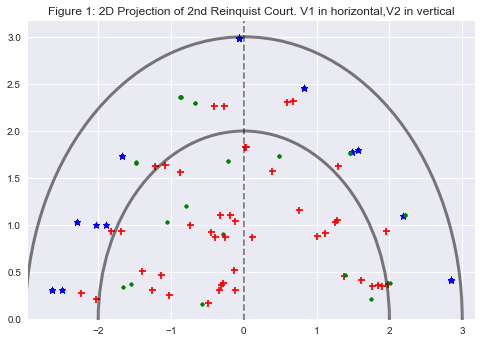

In [19]:
firstComp = np.dot(np.array(decisions),c1)
secComp = np.dot(np.array(decisions),c2)

circle1 = plt.Circle((0, 0), 2, color='black',fill=False,lw = 3, alpha=.5)
circle2 = plt.Circle((0, 0), 3, color='black',fill=False,lw = 3, alpha=.5)

fig, ax = plt.subplots()

ax.add_artist(circle1)
ax.add_artist(circle2)

i = 0
for dec in decFreq:
    if freq[str(dec)] == 1:
        mark='+'
        c = 'red'
        lab = 'visited once'
    elif str(dec) in sigDecisions:
        mark= '*'
        c = 'blue'
        lab = '12 most visited'
    else: 
        mark = '.'
        c = 'green'
        lab = 'next 12 most visited'
    plt.scatter(secComp[i], firstComp[i], marker = mark, color= c, label = lab)        
    i += 1

plt.axvline(0, linestyle = '--', color = 'black',alpha = .5)
plt.title('Figure 1: 2D Projection of 2nd Reinquist Court. V1 in horizontal,V2 in vertical')
plt.show()
